In [1]:
import pandas as pd
from sklearn import preprocessing


In [2]:
training_features = pd.read_csv('training_set_features.csv')
training_labels = pd.read_csv('training_set_labels.csv')
training_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# clean data
# do not drop lines but dropping columns is ok


def cleanData(df : pd.DataFrame):
    # drop employment_industry and employment_occupation because nearly 50% NaNs and filled with dummy-text
    df.drop(['employment_industry', 'employment_occupation'], axis = 1, inplace=True)
    
    ## care for NaNs
    # fill NaN in health-insurance, doctor_recc_h1n1, doctor_recc_seasonal with value 0
    df[['health_insurance','doctor_recc_h1n1','doctor_recc_seasonal']]=df[['health_insurance','doctor_recc_h1n1','doctor_recc_seasonal']].fillna(0)
    # fill NaN in income-poverty with 'missing'
    df['income_poverty']=df['income_poverty'].fillna('missing')
    # fill NaN in rent_or_own with own
    df['rent_or_own']=df['rent_or_own'].fillna('own')
    #fill NaN in employment_status with 'missing'
    df['employment_status']=df['employment_status'].fillna('missing')
    #fill NaN in marital_status with 'missing'
    df['marital_status']=df['marital_status'].fillna('missing')
    #fill NaN in education with 'missing'
    df['education']=df['education'].fillna('College Graduate')
    #fill NaN in household_children and household_adults with 'missing'
    df[['household_children', 'household_adults']]=df[['household_children', 'household_adults']].fillna('missing')
    #fil NaN in opinion_seas_sick_from_vacc, opinion_seas_risk and opinion_seas_vacc_effective with missing
    df[['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective']] = df[['opinion_seas_sick_from_vacc','opinion_seas_risk', 'opinion_seas_vacc_effective']].fillna('missing')
    #fil NaN in opinion_h1n1_sick_from_vacc, oopinion_h1n1_risk and opinion_seas_vacc_effective with missing
    df[['opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']] = df[['opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']].fillna('missing')
    #fill NaN in health_worker with 0
    df['health_worker']=df['health_worker'].fillna(0)
    #fill NaN in child_under_6_months with 0
    df['child_under_6_months']=df['child_under_6_months'].fillna(0)
    #fill NaN in chronic_med_condition with 'missing'
    df['chronic_med_condition']=df['chronic_med_condition'].fillna('missing')
    #fill NaN in behavorial flags with 'missing'
    df[['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face']]=df[['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face']].fillna('missing')
    #fill NaN in h1ns_knowledge with 'missing'
    df['h1n1_knowledge']=df['h1n1_knowledge'].fillna('missing')
    #fill NaN in h1ns_knowledge with 'missing'
    df['h1n1_knowledge']=df['h1n1_knowledge'].fillna('missing')
    #fill NaN in h1ns_concern with 'missing'
    df['h1n1_concern']=df['h1n1_concern'].fillna('missing')
    
    #set correct data-types
    df = df.astype('str')
    
    #handle categorical-data
    le = preprocessing.LabelEncoder()
    list_of_categorical_columns = df.select_dtypes(['object']).columns
    for column in list_of_categorical_columns:
        df[column] = le.fit_transform(df[column])
    
    return df

trainingData = pd.merge(training_features, training_labels, on= 'respondent_id')
cleaned_trainingData = cleanData(trainingData)
cleaned_trainingData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,2,1,0,1,8,2,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,2,1,1,0,1,0,0,0,0,1
2,11112,1,1,0,1,0,0,0,0,0,...,0,1,0,0,9,0,2,0,0,0
3,18930,1,1,0,1,0,1,1,0,0,...,2,1,1,1,5,1,0,0,0,1
4,20041,2,1,0,1,0,1,1,0,1,...,0,0,0,0,9,0,1,0,0,0


In [4]:
def findUnfilledCollumns(df : pd.DataFrame):
    print(df.isnull().sum(axis = 0))
    return

findUnfilledCollumns(cleaned_trainingData)

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [21]:
cleaned_trainingData.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.626690,1.270079,0.054031,0.735537,0.070356,0.827461,0.363987,0.342420,0.683604,...,0.953795,0.545175,0.374920,0.656232,4.829745,0.833489,0.915528,0.566893,0.212454,0.465608
std,7709.791156,0.919392,0.627299,0.237551,0.458374,0.258518,0.381995,0.487878,0.480955,0.475272,...,1.113444,0.594485,0.622325,0.814312,2.805984,0.823313,0.807398,0.982038,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.000000,9.000000,2.000000,4.000000,4.000000,1.000000,1.000000


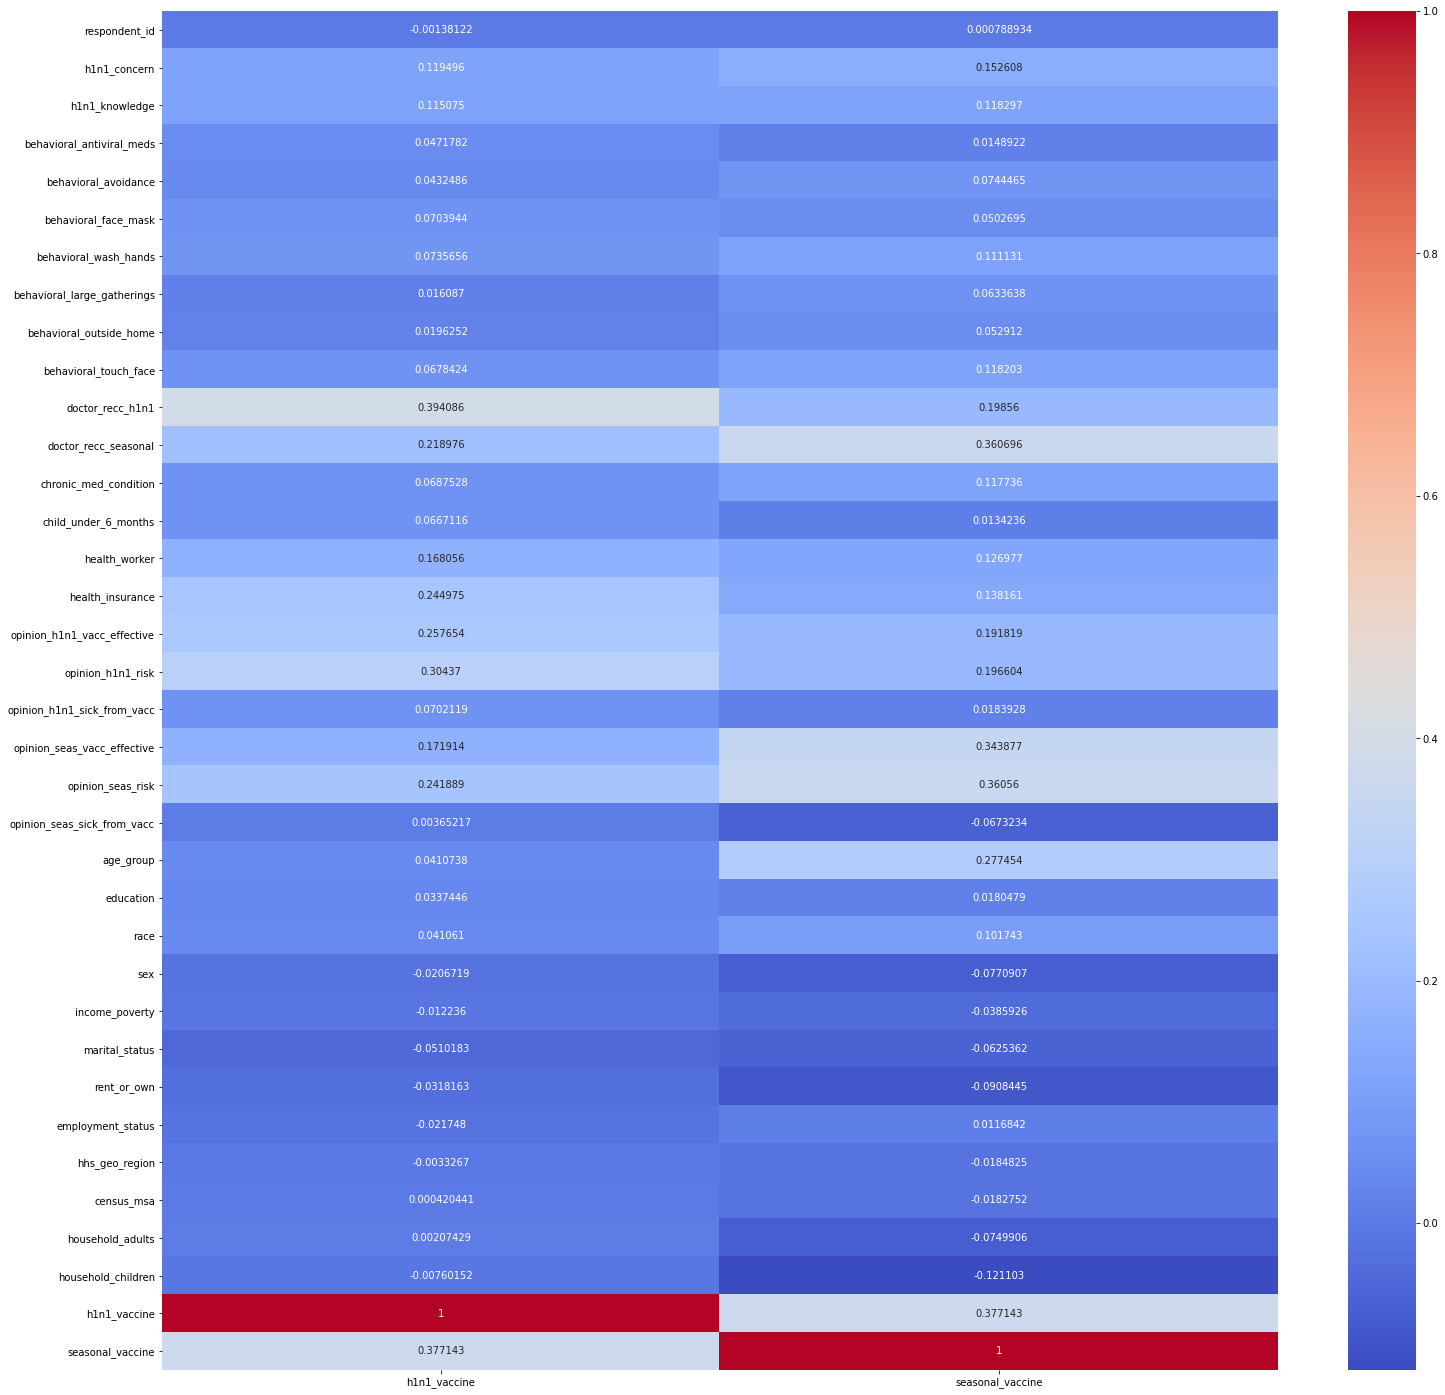

In [20]:
#check correlation
import seaborn as sns
import matplotlib as plt

def createCorrelationHeatmap(df : pd.DataFrame):
    fig = plt.pyplot.gcf() 
    fig.set_size_inches(25,25)
    data = pd.DataFrame(df.corr()[['h1n1_vaccine','seasonal_vaccine']])
    sns.heatmap(data, annot = True, fmt='g',cmap= 'coolwarm')
    return

createCorrelationHeatmap(cleaned_trainingData)

In [4]:
# use gradient tree boost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


h1n1_accuracy: 0.8526208304969367
seasonal_accuracy: 0.7837531200363059


In [5]:
# use k-nearest-neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = KNeighborsClassifier().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = KNeighborsClassifier().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


h1n1_accuracy: 0.7591331971862946
seasonal_accuracy: 0.5339233038348082


In [6]:
# use AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = AdaBoostClassifier().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = AdaBoostClassifier().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8509189925119128
seasonal_accuracy: 0.7826185613796234


In [8]:
# use naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = GaussianNB().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = GaussianNB().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8112094395280236
seasonal_accuracy: 0.7430224642614023


In [9]:
# use decision-tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.7659405491263899
seasonal_accuracy: 0.6813024733378715


In [10]:
# use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8493306103925573
seasonal_accuracy: 0.7804628999319265


In [ ]:
#use neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = MLPClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = MLPClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

In [10]:
def competitionOutput(filenameIn, filenameOut,estimator_seasonal, estimator_h1n1):
    # prepare competition features
    competition_features = pd.read_csv(filenameIn)
    print('competition_features shape: ',competition_features.shape)
    competition_features_cleaned = cleanData(competition_features)
    print('competition features cleaned shape: ', competition_features_cleaned.shape)

    predictions_seasonal = estimator_seasonal.predict(competition_features_cleaned)
    print('shape predictions seasonal: ', predictions_seasonal.shape)
    predictions_h1n1 = estimator_h1n1.predict(competition_features_cleaned)
    print('shape predictions h1n1: ', predictions_h1n1.shape)
    competition_result = competition_features
    competition_result['h1n1_vaccine'] = predictions_h1n1
    competition_result['seasonal_vaccine'] = predictions_seasonal
    competition_result = competition_result[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]
    
    # create output csv
    competition_result.to_csv(filenameOut, index=False)
    return competition_features_cleaned

competition_features_cleaned = competitionOutput('test_set_features.csv', 'resultV1.csv', clf_seasonal, clf_h1n1)
competition_features_cleaned.columns[competition_features_cleaned.isna().any()].tolist()

competition_features shape:  (26708, 36)
competition features cleaned shape:  (26708, 34)
shape predictions seasonal:  (26708,)
shape predictions h1n1:  (26708,)


[]